## Question 1:
> Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utli_functions import create_data_from_file, plot_labels, mse, accuracy

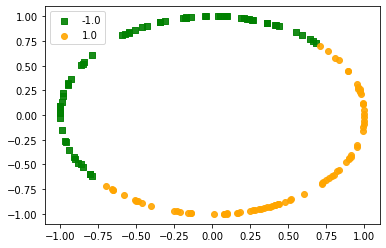

In [2]:
X, y = create_data_from_file(file_name='two_circle.txt')

# plot the train data with the real labels of dots (before predicting)
plot_labels(X, y)

In [3]:
class Perceptron(object):
    def __init__(self):
        self.errors_ = None
        self.learning_rate = 0.1
        self.weights = None
        self.bias = 0.1
        self.n_iter = 100
    def net_input(self, X):
        z = np.dot(X, self.weights[:]) + self.bias
        return z

    def predict(self, X):
        return np.array(np.where(self.net_input(X) >= 0, 1, -1))

    def fit(self, X, y):
        rgen = np.random.RandomState(1)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.bias=self.weights[0]
        self.weights=self.weights[1:]
        self.errors_ = []
        for _ in range(self.n_iter): # Repeat training data for the number of trainings
            output = self.predict(X)
            errors = y - output
            self.weights[:] += self.learning_rate * X.T.dot(errors)

            # Weight w_Update 0
            self.bias += self.learning_rate*errors
            
            # Calculation of cost function
            cost = mse(y,output)

            # cost storage
            self.errors_.append(cost)
        return self

In [4]:
per_model = Perceptron()
per_model.fit(X ,y)

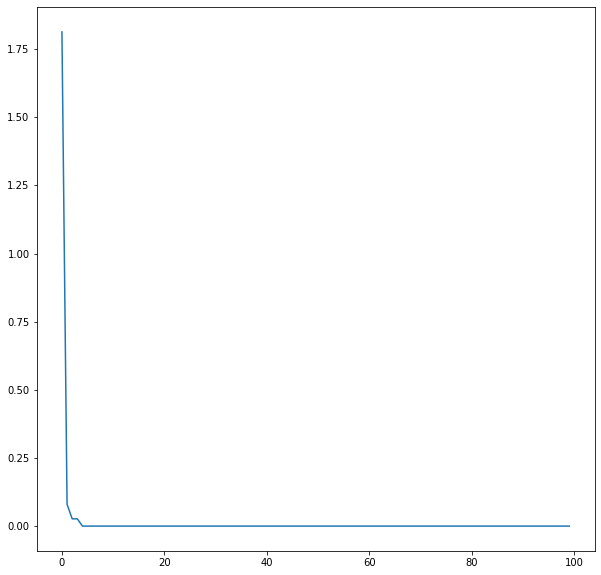

In [5]:
plt.plot(per_model.errors_)
plt.show()

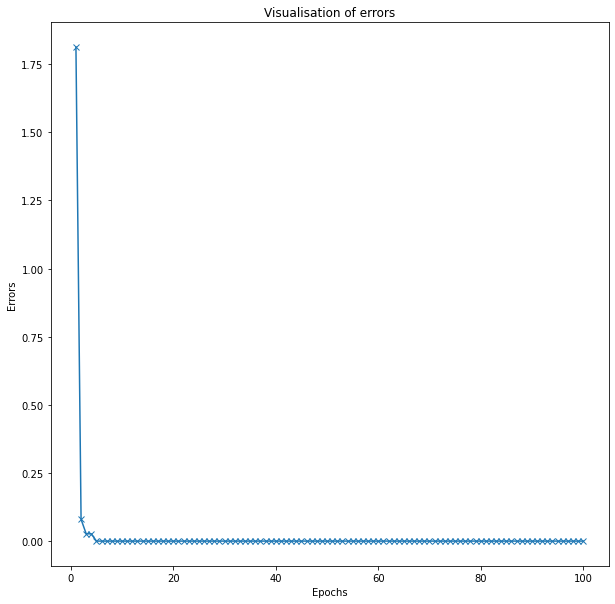

In [6]:
plt.plot(range(1, len(per_model.errors_) + 1), per_model.errors_, marker = 'x')
plt.title("Visualisation of errors")
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

In [7]:
y.shape

(150,)

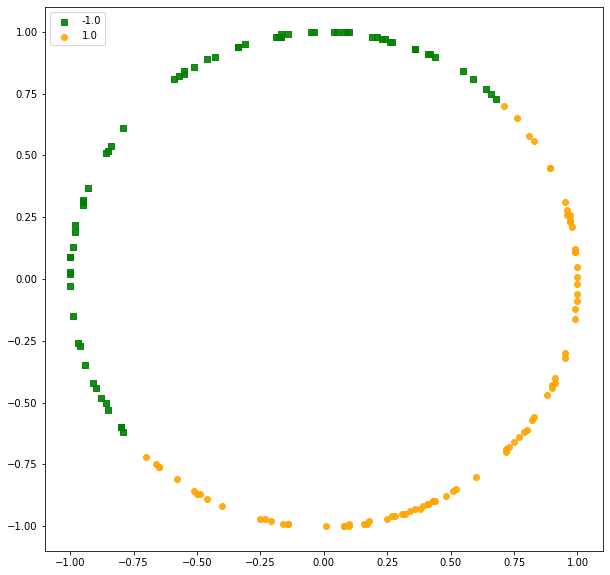

In [8]:
predicted = per_model.predict(X)
plot_labels(X, predicted)

In [9]:
print(f"Train data accuracy: {accuracy(y, predicted)}")

Train data accuracy: 1.0
